In [1]:
from Classification import VGG_cls_pre, Global_Regressor
import torch
import cv2 as cv
from imgaug import augmenters as iaa
import numpy as np 
import torchsummary
imagenet_stats = {'mean': [0.485, 0.456, 0.406],
                    'std': [0.229, 0.224, 0.225]}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from Classification import VGG_cls_pre, Global_Regressor
model = VGG_cls_pre("../modelsave/utk_coral.pth").to(device)
model(torch.randn(1, 3, 224, 224).to(device), torch.Tensor(np.array([[1, 10, 3]])).to(torch.int32).to(device))

Get Global_Regressor
=> loaded checkpoint '../modelsave/utk_coral.pth'


tensor([2], device='cuda:0', dtype=torch.int32)

RuntimeError: CUDA out of memory. Tried to allocate 392.00 MiB (GPU 0; 3.95 GiB total capacity; 1.09 GiB already allocated; 46.69 MiB free; 1.13 GiB reserved in total by PyTorch)

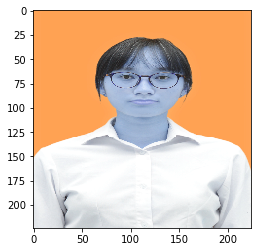

In [4]:
img_path = 'thuyha.jpg'
img = cv.imread(img_path)
img = cv.resize(img, (224, 224))
import matplotlib.pyplot as plt
from age_predict import *
plt.imshow(img)
aug = iaa.Sequential([
            iaa.CropToFixedSize(width=224, height=224, position="center")
        ])

img = np.array(img)
img = aug(image=img)
img = img.astype(np.float32) / 255.
img = torch.from_numpy(np.transpose(img, (2, 0, 1)))
dtype = img.dtype
mean = torch.as_tensor(imagenet_stats['mean'], dtype=dtype)
std = torch.as_tensor(imagenet_stats['mean'], dtype=dtype)
img.sub_(mean[:, None, None]).div_(std[:, None, None])
img.unsqueeze(0).shape
with torch.no_grad():
    predict_mwr = torch.Tensor(np.array([[0, 10, 22]])).to(torch.int32).to(device)
    model = load_mwr_model('../modelsave/utk_coral_local.pth')
    age  = age_estimate_mwr(model, img_path = img_path)
    print(age)
    prob = model(img.unsqueeze(0).to(device), predict_mwr)
# plt.hist(torch.nn.functional.softmax(prob, dim=1))
# plt.show()
print(prob)

In [ ]:
torch.cuda.empty_cache()